In [19]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats


In [20]:
my_data = np.genfromtxt('/Users/alfredo/Desktop/data/inst_noiseless_data_short.csv', delimiter=',')
n_data = np.genfromtxt('/Users/alfredo/Desktop/data/inst_noiseless_data_short.csv', delimiter=',')

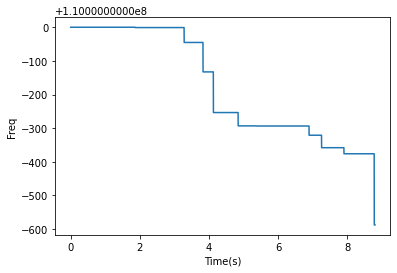

In [21]:
time, mode_1 = my_data[:,0], my_data[:,2]
n_mode_1 = n_data[:,0], n_data[:,1]
plt.ylabel('Freq')
plt.xlabel('Time(s)')
# plt.plot(times, mode1+noise[:,0])
plt.plot(time, mode_1)

# plt.plot(times, mode2)
# plt.scatter(mode1_jumps, mode2_jumps)
# plt.plot(t-2538, m1)

plt.show()


In [22]:
jump_len = 10
df_window = 400
total_window = 2*df_window+5

In [23]:
t_values = []
n_t_values = []


for i in range(0, len(mode_1)-total_window):
    first_range = mode_1[i:i+df_window]
    second_range = mode_1[i+df_window+jump_len:i+total_window]
    t_val = stats.ttest_ind(first_range, second_range).statistic
    t_values.append(t_val)
    
for i in range(0, len(n_mode_1)-total_window):
    first_range = n_mode_1[i:i+df_window]
    second_range = n_mode_1[i+df_window+jump_len:i+total_window]
    t_val = stats.ttest_ind(first_range, second_range).statistic
    n_t_values.append(t_val)

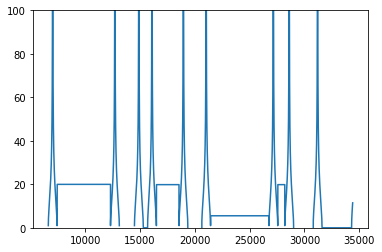

In [24]:
plt.ylim(0,100)
plt.plot(np.asarray(range(len(t_values))), t_values)
plt.plot(np.asarray(range(len(n_t_values))), n_t_values)
plt.show()

In [7]:
t_values = np.array(t_values)
top_t = t_values[t_values>20]
top_ind = np.nonzero(t_values > 10)

In [8]:
time[top_ind]

array([0.294  , 0.29425, 0.2945 , ..., 8.23775, 8.238  , 8.23825])

In [9]:
t = stats.t.ppf(0.999999426696856,df_window)

In [10]:
t

4.940656894366652

In [26]:
my_data.shape

(35202, 3)

In [34]:
my_data[:10,:].shape

(10, 3)

In [36]:
def TwoSampleT2Test(X, Y):
    nx, p = X.shape
    ny, _ = Y.shape
    delta = np.mean(X, axis=0) - np.mean(Y, axis=0)
    Sx = np.cov(X, rowvar=False)
    Sy = np.cov(Y, rowvar=False)
    S_pooled = ((nx-1)*Sx + (ny-1)*Sy)/(nx+ny-2)
    t_squared = (nx*ny)/(nx+ny) * np.matmul(np.matmul(delta.transpose(), np.linalg.inv(S_pooled)), delta)
    statistic = t_squared * (nx+ny-p-1)/(p*(nx+ny-2))
    F = f(p, nx+ny-p-1)
    p_value = 1 - F.cdf(statistic)
    print(f"Test statistic: {statistic}\nDegrees of freedom: {p} and {nx+ny-p-1}\np-value: {p_value}")
    return statistic, p_value

In [44]:
def multivariate_t_test(data, thresh = 25):
    '''
    An initial approach for jump detection using the threshold-t-value
    thresh is currently arbitraritly defined
    '''
    jump_len = 1
    df_window = 100
    total_window = 2*df_window+5
    t_values = []


    for i in range(0, data.shape[0]-total_window, 1):
        first_range = data[i:i+df_window,:]
        second_range = data[i+df_window+jump_len:i+total_window,:]
        t_val, _ = TwoSampleT2Test(first_range, second_range)
        t_values.append(t_val)

    t_values = np.array(t_values)
    pred_jumps_ind = np.nonzero(t_values > thresh)[0]
    return pred_jumps_ind.tolist()

In [45]:
TT = multivariate_t_test(my_data)

LinAlgError: Singular matrix